# Information Criteria - Examples

Using different information criteria methods

Here we import the NARMAX model, the metric for model evaluation and the methods to generate sample data for tests. Also, we import pandas for specific usage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.polynomial_basis import PolynomialNarmax
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data


Generating 1 input 1 output sample data
  
The data is generated by simulating the following model:
$y_k = 0.2y_{k-1} + 0.1y_{k-1}x_{k-1} + 0.9x_{k-1} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.1$

In the next example we will generate a data with 3000 samples with white noise and selecting 90% of the data to train the model. 

In [2]:
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.2,
                                                   train_percentage=90)

The idea is to show the impact of the information criteria to select the number of terms to compose the final model. You will se why it is an auxiliary tool and let the algorithm select the number of terms based on the minimum value is not a good idea when dealing with data highly corrupted by noise (even white noise) 

Note: You may find different results when running the examples. This is due the fact we are not setting a fixed random generator for the sample data. However, the main analysis remain. 

AIC

0.3934473153088806
      Regressors Parameters         ERR
0        x1(k-2)     0.8805  0.82870279
1         y(k-1)     0.1990  0.04043061
2  x1(k-1)y(k-1)     0.0854  0.00229570
3  x1(k-2)y(k-1)    -0.0274  0.00023702
4      x1(k-2)^2     0.0192  0.00022685


Text(0, 0.5, 'Information Criteria')

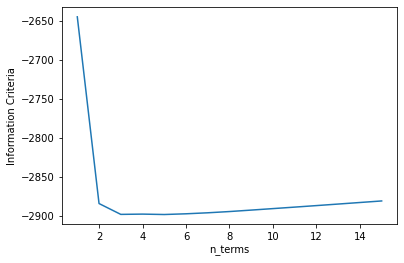

In [3]:
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=15,
                         extended_least_squares=False,
                         ylag=2, xlag=2,
                         info_criteria='aic',
                         estimator='least_squares',
                         )

model.fit(x_train, y_train)
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [4]:
model.info_values

array([-2645.25644153, -2884.57180297, -2898.46898376, -2898.12279253,
       -2898.63304969, -2897.72014153, -2896.42865166, -2894.8323514 ,
       -2892.96893425, -2891.06015084, -2889.14733108, -2887.20019762,
       -2885.22702095, -2883.24160575, -2881.25140789])

As can be seen above, the minimum value make the algorithm choose a model with 5 terms. However, if you check the plot, 3 terms is the best choice. Incresase the number of terms from 3 upwards do not lead to a better model since the difference is very small.

In this case, you should run the model again with the parameters *n_terms=3*! The ERR algorithm ordered the terms in a correct way, so you will get the exact model structure again! 

BIC 

0.3929140482842041
      Regressors Parameters         ERR
0        x1(k-2)     0.8804  0.82870279
1         y(k-1)     0.1985  0.04043061
2  x1(k-1)y(k-1)     0.0853  0.00229570


Text(0, 0.5, 'Information Criteria')

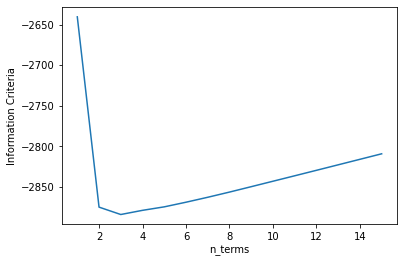

In [5]:
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=15,
                         extended_least_squares=False,
                         ylag=2, xlag=2,
                         info_criteria='bic',
                         estimator='least_squares',
                         )

model.fit(x_train, y_train)
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [6]:
model.info_values

array([-2640.45627146, -2874.97146283, -2884.06847355, -2878.92211226,
       -2874.63219935, -2868.91912112, -2862.82746118, -2856.43099085,
       -2849.76740364, -2843.05845016, -2836.34546033, -2829.5981568 ,
       -2822.82481007, -2816.03922479, -2809.24885687])

BIC did a better job in this case! The way it penalizes the model regarding the number of terms ensure that the minimum value here was exact the number of expected terms to compose the model. Good, but not aways the best method!

LILC

0.3929140482842041
      Regressors Parameters         ERR
0        x1(k-2)     0.8804  0.82870279
1         y(k-1)     0.1985  0.04043061
2  x1(k-1)y(k-1)     0.0853  0.00229570


Text(0, 0.5, 'Information Criteria')

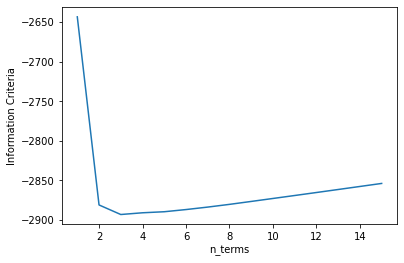

In [7]:
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=15,
                         extended_least_squares=False,
                         ylag=2, xlag=2,
                         info_criteria='lilc',
                         estimator='least_squares',
                         )

model.fit(x_train, y_train)
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [8]:
model.info_values

array([-2643.42254629, -2880.90401248, -2892.96729803, -2890.78721156,
       -2889.46357347, -2886.71677006, -2883.59138495, -2880.16118945,
       -2876.46387706, -2872.7211984 , -2868.9744834 , -2865.19345469,
       -2861.38638278, -2857.56707234, -2853.74297923])

LILC also includes spurious terms. Like AIC, it fails to automatically select the correct terms but you could select the right number based on the plot above!

FPE

0.3934473153088806
      Regressors Parameters         ERR
0        x1(k-2)     0.8805  0.82870279
1         y(k-1)     0.1990  0.04043061
2  x1(k-1)y(k-1)     0.0854  0.00229570
3  x1(k-2)y(k-1)    -0.0274  0.00023702
4      x1(k-2)^2     0.0192  0.00022685


Text(0, 0.5, 'Information Criteria')

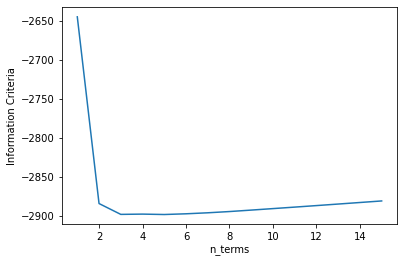

In [9]:
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=15,
                         extended_least_squares=False,
                         ylag=2, xlag=2,
                         info_criteria='fpe',
                         estimator='least_squares',
                         )

model.fit(x_train, y_train)
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [10]:
model.info_values

array([-2645.2564407 , -2884.57179636, -2898.46896144, -2898.12273962,
       -2898.63294635, -2897.71996295, -2896.42836809, -2894.8319281 ,
       -2892.96833154, -2891.05932406, -2889.14623062, -2887.1987689 ,
       -2885.22520443, -2883.23933691, -2881.24861726])

FPE also failed to automatically select the right number of terms! But, as we pointed out before, Information Criteria is an auxiliary tool! If you look at the plots, all the methods allows you to choose the right numbers of terms!

Importante Note: Here we are dealing with a known model structure! Concerning real data, we do not know the rigth number of terms so the methods above stands as excelents tools to help you out!

If you check the metrics above, even with the models with more terms, you will see excelents metrics! But System Identification always search for the best model structure! Model Structure Selection is the core of NARMAX methods! In this respect, the examples are to show basic concepts and how the algorithms work!